In [1]:
#### Importing required Packages######

from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import glob
import cv2
from PIL import Image
import os

In [ ]:
##### Loading the Mnist dataset######

def load_mnist_dataset():
    # load the MNIST dataset and stack the training data and testing
    # data together (we'll create our own training and testing splits
    # later in the project)
    ((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
    data = np.vstack([trainData, testData])
    labels = np.hstack([trainLabels, testLabels])
    # return a 2-tuple of the MNIST data and labels
    return (data, labels)

In [2]:
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

In [6]:
trainData.shape, trainLabels.shape

((60000, 28, 28), (60000,))

In [19]:
mod_data = np.empty(trainData.shape + (3,))
template = np.zeros((28,28,3))

In [20]:
mod_data.shape

(60000, 28, 28, 3)

In [15]:
choice_list = [0,1,2]

In [16]:
np.random.choice(choice_list)

2

In [14]:
template.shape

(28, 28, 3)

In [52]:
### Randomly assigning a (R or G or B)channel to each image######

l = []
for i in range(trainData.shape[0]):
    template = np.zeros((28,28,3))
    image = trainData[i,:,:]
    n = np.random.choice(choice_list)
    template[:,:,n] = image
    l.append(template)
    mod_data[i,:,:,:] = template
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


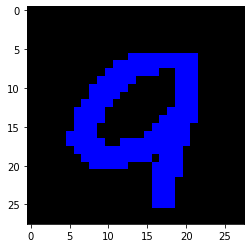

In [53]:
plt.imshow(mod_data[3000])

In [54]:
len(l)

60000

In [44]:
np.max(mod_data[3000])

255.0

In [45]:
np.min(mod_data)

0.0

In [46]:
trainLabels.shape

(60000,)

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os


In [125]:
base = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(32,32, 3)))  
top = base.output
#top = MaxPooling2D(pool_size=(2, 2))(top)
top = Flatten(name="flatten")(top)
top = Dense(64, activation="relu")(top)
top = Dropout(0.5)(top)
top = Dense(32, activation="relu")(top)
top = Dense(10, activation="softmax")(top)

In [126]:
model = Model(inputs = base.input, outputs=top)

In [127]:
model.load_weights('exp1.h5')

In [128]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [59]:
data = [cv2.resize(image, (32, 32)) for image in l]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


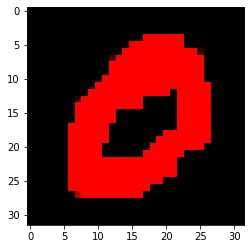

In [79]:
plt.imshow(255*data[1])

In [61]:
data = np.array(data, dtype="float32")
data /= 255.0

In [62]:
data.shape

(60000, 32, 32, 3)

In [85]:
le = LabelBinarizer()
labels = le.fit_transform(trainLabels)

In [83]:
labels = to_categorical(labels)

In [86]:
labels[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
np.max(data[1])

0.99903494

In [88]:
int_lr = 1e-3
epoch = 50
bs= 64
adm = Adam(lr=int_lr, decay=int_lr / epoch)
model.compile(loss="categorical_crossentropy", optimizer=adm,metrics=["accuracy"])

In [89]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [90]:
mygen = ImageDataGenerator(
	rotation_range=10,
	zoom_range=0.05,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.15,
	horizontal_flip=False,
	fill_mode="nearest")

In [91]:
fit_model = model.fit_generator(mygen.flow(trainX, trainY, batch_size=bs),
                        steps_per_epoch=len(trainX) // bs,
                        validation_data=(testX, testY),
                        validation_steps=len(testX) // bs,
                        epochs=epoch)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
  3/750 [..............................] - ETA: 20:14 - loss: 6.0402 - accuracy: 0.1406

KeyboardInterrupt: 

In [94]:
testData.shape

(10000, 28, 28)

In [98]:
test_data = np.empty(testData.shape + (3,))
template = np.zeros((28,28,3))

In [117]:
from tqdm import tqdm

In [118]:

#### Each pixel of test data is given a random color########

t_l = []
for i in tqdm(range(testData.shape[0])):
    template = np.zeros((28,28,3))
    image = testData[i,:,:]
    for j in range(28):
        for t in range(28):
            n = np.random.choice(choice_list)
            template[j,t,n] = image[j,t]
            
    t_l.append(template)
    test_data[i,:,:,:] = template

100%|██████████| 10000/10000 [00:43<00:00, 230.01it/s]


In [119]:
image = test_data[1,:,:,:]

In [113]:
im = testData[1,:,:]

In [122]:
image = t_l[1]

In [123]:
testLabels[1]

2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


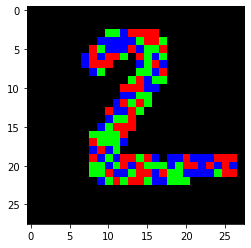

In [124]:
plt.imshow(image)

In [130]:
t_data = [cv2.resize(image, (32, 32)) for image in t_l]

In [133]:
t_data[1].shape

(32, 32, 3)

In [2]:
predIdxs = model.predict(t_data[1])
2

2